In [120]:
from skimage import data
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

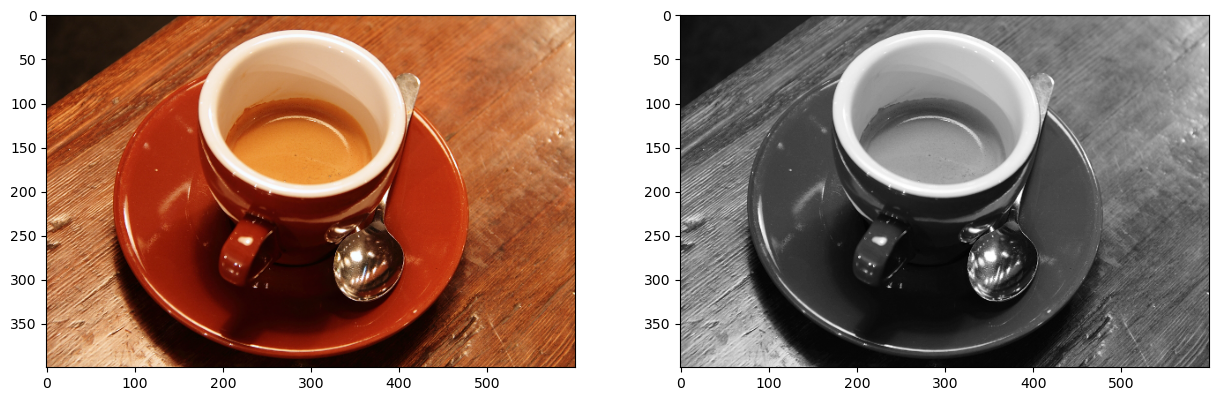

In [121]:
# Setting the plot size to 15,15
plt.figure(figsize=(15, 15))

# Sample Image of scikit-image package
coffee = data.coffee()
plt.subplot(1, 2, 1)

# Displaying the sample image
plt.imshow(coffee)

# Converting RGB image to Monochrome
gray_coffee = rgb2gray(coffee)
plt.subplot(1, 2, 2)
# Displaying the sample image - Monochrome
# Format
plt.imshow(gray_coffee, cmap="gray")

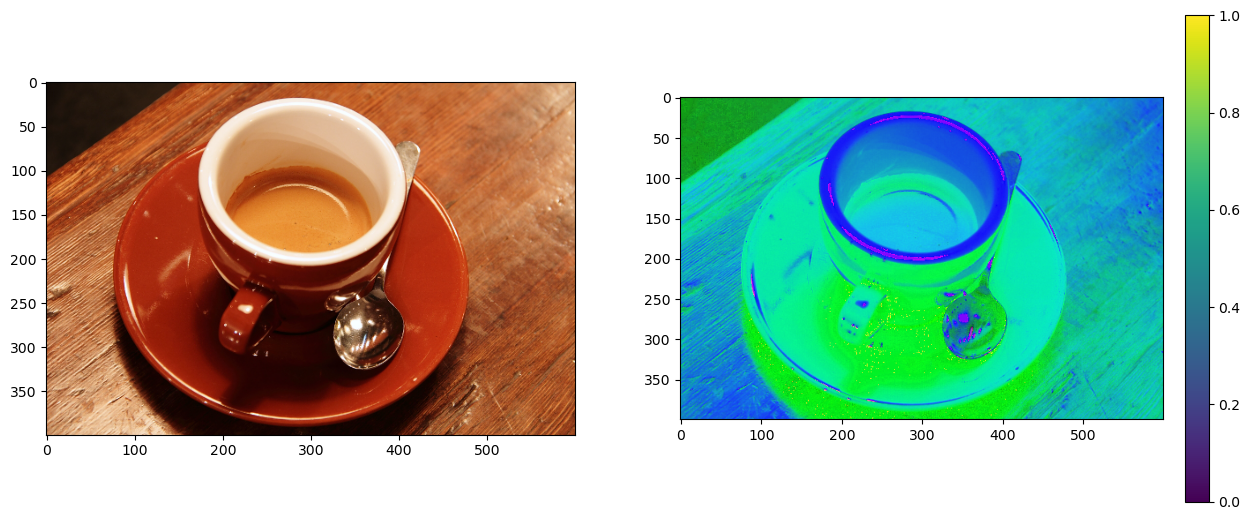

In [122]:
from skimage.color import rgb2hsv

# Setting the plot size to 15,15
plt.figure(figsize=(15, 15))

# Sample Image of scikit-image package
coffee = data.coffee()
plt.subplot(1, 2, 1)

# Displaying the sample image
plt.imshow(coffee)

# Converting RGB Image to HSV Image
hsv_coffee = rgb2hsv(coffee)
plt.subplot(1, 2, 2)

# Displaying the sample image - HSV Format
hsv_coffee_colorbar = plt.imshow(hsv_coffee)

# Adjusting colorbar to fit the size of the image
plt.colorbar(hsv_coffee_colorbar, fraction=0.046, pad=0.04)

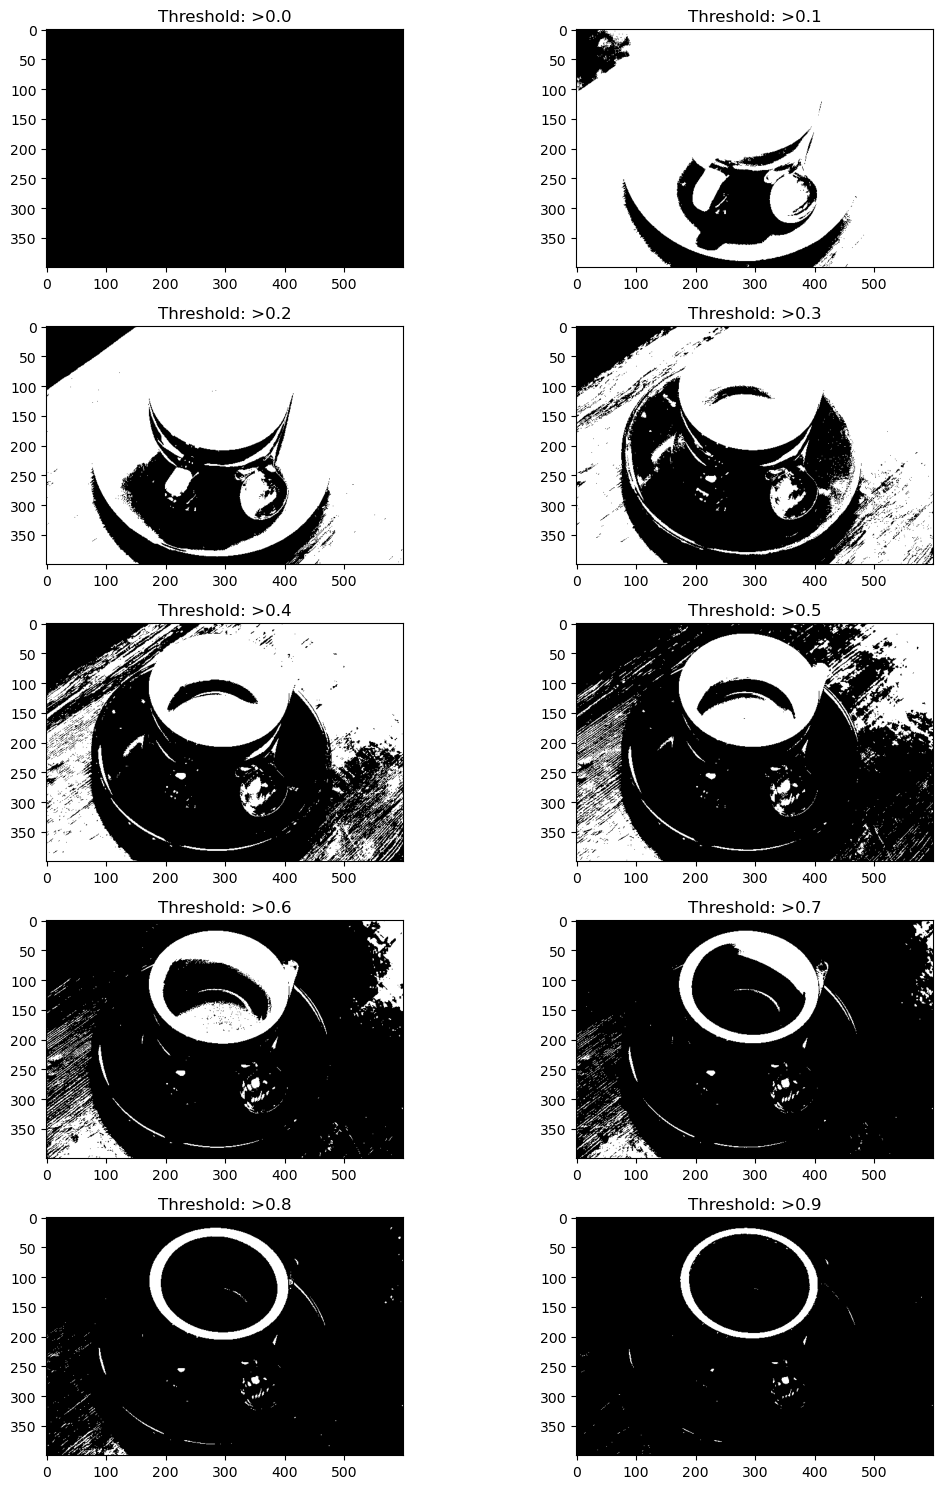

In [123]:
# Importing Necessary Libraries
# Displaying the sample image - Monochrome Format
from skimage import data
from skimage import filters

# Sample Image of scikit-image package
coffee = data.coffee()
gray_coffee = rgb2gray(coffee)

# Setting the plot size to 15,15
plt.figure(figsize=(15, 15))

for i in range(10):

    # Iterating different thresholds
    binarized_gray = (gray_coffee > i * 0.1) * 1
    plt.subplot(5, 2, i + 1)

    # Rounding of the threshold
    # value to 1 decimal point
    plt.title("Threshold: >" + str(round(i * 0.1, 1)))

    # Displaying the binarized image
    # of various thresholds
    plt.imshow(binarized_gray, cmap="gray")

    plt.tight_layout()

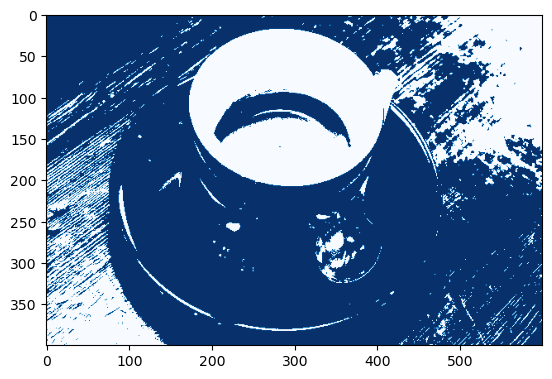

In [124]:
binarized_gray = gray_coffee < 0.5
plt.imshow(binarized_gray, cmap="Blues")

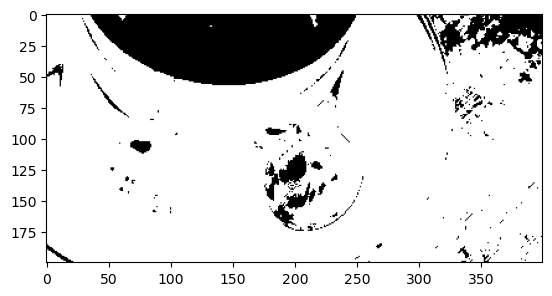

In [125]:
import skimage

crop = skimage.util.crop(binarized_gray, (150, 50), copy=False, order="K")
plt.imshow(crop, cmap="grey")

In [126]:
from skimage.draw import circle_perimeter
from skimage.filters import gaussian
import numpy as np

In [127]:
# img = np.zeros((100, 100))

img = binarized_gray
rr, cc = circle_perimeter(35, 45, 25)
img[rr, cc] = 1
img = gaussian(img, 2, preserve_range=False)

In [128]:
s = np.linspace(0, 2 * np.pi, 100)
init = 50 * np.array([np.sin(s), np.cos(s)]).T + 50

In [129]:
snake = skimage.segmentation.active_contour(img, init, w_edge=0, w_line=1)
dist = np.sqrt((45 - snake[:, 0]) ** 2 + (35 - snake[:, 1]) ** 2)
int(np.mean(dist))

42

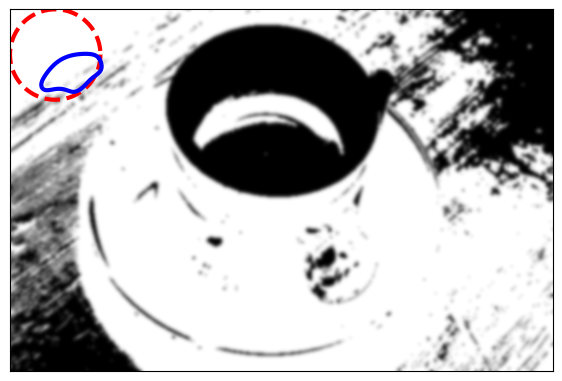

In [130]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(img, cmap=plt.cm.gray)
ax.plot(init[:, 1], init[:, 0], "--r", lw=3)
ax.plot(snake[:, 1], snake[:, 0], "-b", lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])

plt.show()

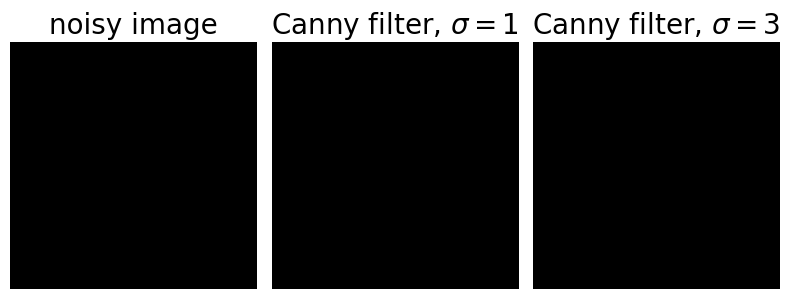

In [131]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from skimage.util import random_noise
from skimage import feature


# Generate noisy image of a square
image = np.zeros((128, 128), dtype=float)
# image[32:-32, 32:-32] = 1

# image = ndi.rotate(image, 15, mode='constant')
# image = ndi.gaussian_filter(image, 4)
# image = random_noise(image, mode='speckle', mean=0.1)

# Compute the Canny filter for two values of sigma
edges1 = feature.canny(image)
edges2 = feature.canny(image, sigma=3)

# display results
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(8, 3))

ax[0].imshow(image, cmap="gray")
ax[0].set_title("noisy image", fontsize=20)

ax[1].imshow(edges1, cmap="gray")
ax[1].set_title(r"Canny filter, $\sigma=1$", fontsize=20)

ax[2].imshow(edges2, cmap="gray")
ax[2].set_title(r"Canny filter, $\sigma=3$", fontsize=20)

for a in ax:
    a.axis("off")

fig.tight_layout()
plt.show()

In [132]:
import skimage as ski

102

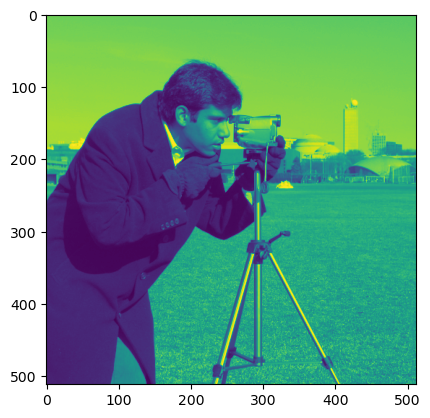

In [133]:
plt.imshow(camera)
threshold_value = ski.filters.threshold_otsu(camera)
threshold_value

In [134]:
camera

array([[200, 200, 200, ..., 189, 190, 190],
       [200, 199, 199, ..., 190, 190, 190],
       [199, 199, 199, ..., 190, 190, 190],
       ...,
       [ 25,  25,  27, ..., 139, 122, 147],
       [ 25,  25,  26, ..., 158, 141, 168],
       [ 25,  25,  27, ..., 151, 152, 149]], dtype=uint8)

In [135]:
path = "/home/t.afanasyeva/SRF_anemia/4_granular class 4/Experiment_Group(1)_E5_47.tif"

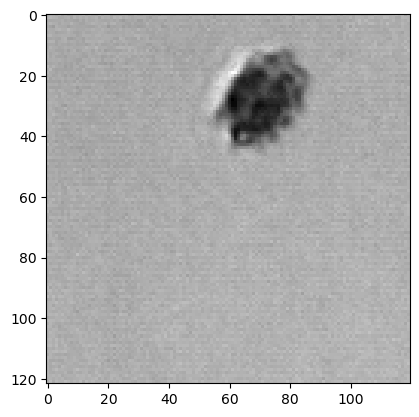

In [136]:
img = skimage.io.imread(
    path,
    plugin="tifffile",
)[:, :, :3]

img = rgb2gray(img)
plt.imshow(img, cmap="grey")

In [137]:
threshold_value = ski.filters.threshold_otsu(img)
threshold_value

0.470703125

In [138]:
path

'/home/t.afanasyeva/SRF_anemia/4_granular class 4/Experiment_Group(1)_E5_47.tif'

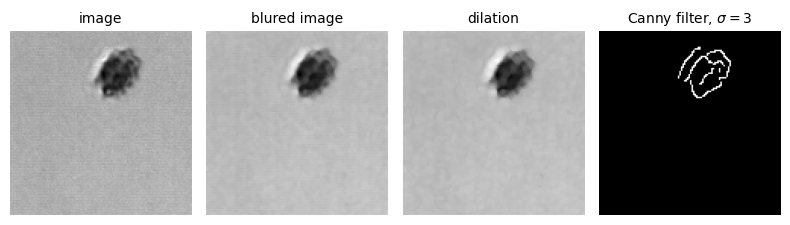

In [177]:
img = cv2.imread(path, 0)
blur = cv2.medianBlur(img, 3)

kernel = np.ones((2, 2), np.uint8)
# img_erosion = cv2.erode(img, kernel, iterations=1)
img_dilation = cv2.dilate(blur, kernel, iterations=1)

edges2 = feature.canny(img_dilation, sigma=1.5)

# display results
myfontsize = 10
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(8, 4))

ax[0].imshow(img, cmap="gray")
ax[0].set_title("image", fontsize=myfontsize)

ax[1].imshow(blur, cmap="gray")
ax[1].set_title(r"blured image", fontsize=myfontsize)

ax[2].imshow(img_dilation, cmap="gray")
ax[2].set_title(r"dilation", fontsize=myfontsize)

ax[3].imshow(edges2, cmap="gray")
ax[3].set_title(r"Canny filter, $\sigma=3$", fontsize=myfontsize)

for a in ax:
    a.axis("off")

fig.tight_layout()
plt.show()

(-0.5, 119.5, 121.5, -0.5)

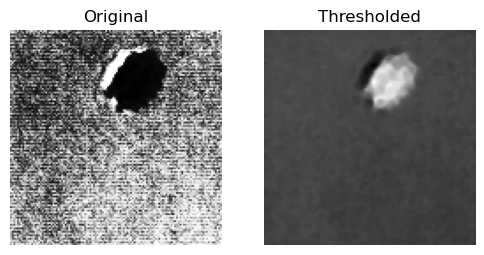

In [186]:
img = cv2.equalizeHist(img)


# thresh = cv2.adaptiveThreshold(
#     img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, blockSize=53, C=31
# )

thresh = cv2.adaptiveThreshold(
    img_dilation,
    255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY_INV,
    blockSize=53,
    C=31,
)

bnt = cv2.bitwise_not(img_dilation, thresh)

fig, axes = plt.subplots(ncols=2, figsize=(6, 3))
ax = axes.ravel()
ax[0] = plt.subplot(1, 2, 1)
ax[1] = plt.subplot(1, 2, 2)
# ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(img, cmap=plt.cm.gray)
ax[0].set_title("Original")
ax[0].axis("off")

ax[1].imshow(bnt, cmap="gray")
ax[1].set_title("Thresholded")
ax[1].axis("off")

In [ ]:
img = cv2.imread(path)

B, G, R = cv2.split(img)
B = cv2.equalizeHist(B)
G = cv2.equalizeHist(G)
R = cv2.equalizeHist(R)
out = cv2.merge((B, G, R))

plt.imshow(out, cmap="gray")
# outfile = os.path.splitext(fname)[0] + '_eq.jpg' # change fname to tack on eq
#                                                   # (equalized) and change
# cv2.imwrite(outfile, np.hstack((img,out)))

ValueError: not enough values to unpack (expected 3, got 1)

In [144]:
img = cv2.imread(path)

B, G, R = cv2.split(img)
B = cv2.equalizeHist(B)
G = cv2.equalizeHist(G)
R = cv2.equalizeHist(R)
out = cv2.merge((B, G, R))

plt.imshow(out, cmap="gray")
# outfile = os.path.splitext(fname)[0] + '_eq.jpg' # change fname to tack on eq
#                                                   # (equalized) and change
# cv2.imwrite(outfile, np.hstack((img,out)))

ValueError: not enough values to unpack (expected 3, got 1)

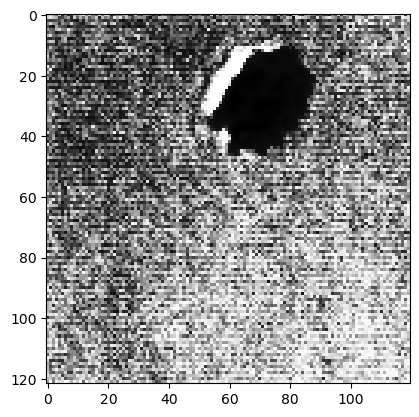

In [151]:
img = cv2.imread(path, 0)
img = cv2.equalizeHist(img)
plt.imshow(img, cmap="gray")

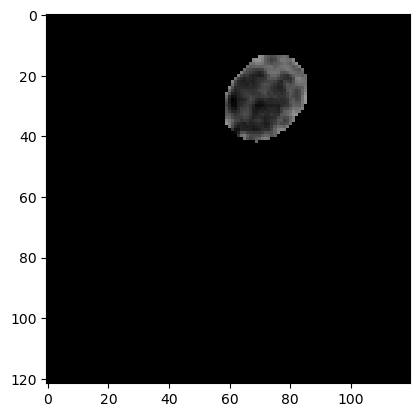

In [198]:
img = cv2.imread(path)
hh, ww = img.shape[:2]

# threshold on white
# Define lower and uppper limits
lower = np.array([150, 150, 150])
upper = np.array([255, 255, 255])

# Create mask to only select black
thresh = cv2.inRange(img, lower, upper)

# apply morphology
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (20, 20))
morph = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

# invert morp image
mask = 255 - morph

# apply mask to image
result = cv2.bitwise_and(img, img, mask=mask)
plt.imshow(result, cmap="gray")

In [220]:
import os

directory = "/home/t.afanasyeva/SRF_anemia/4_granular class 4"
path_out = "/home/t.afanasyeva/SRF_anemia/4_granular"
for filename in os.listdir(directory):
    img = cv2.imread(path, 0)
    name_out = "_".join(filename.split(".")[0].split("_")[2:5]) + ".png"
    cv2.imwrite(os.path.join(path_out, name_out), img)

In [ ]:
img = cv2.imread(path)

B, G, R = cv2.split(img)
B = cv2.equalizeHist(B)
G = cv2.equalizeHist(G)
R = cv2.equalizeHist(R)
out = cv2.merge((B, G, R))

plt.imshow(out, cmap="gray")
# outfile = os.path.splitext(fname)[0] + '_eq.jpg' # change fname to tack on eq
#                                                   # (equalized) and change
# cv2.imwrite(outfile, np.hstack((img,out)))

ValueError: not enough values to unpack (expected 3, got 1)